### Assignment 2: Fitting and Alignment

#### 1. Blob Detection

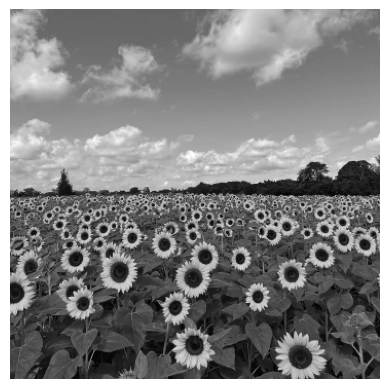

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

sunflower_image = cv.imread("images/the_berry_farms_sunflower_field.jpeg", cv.IMREAD_REDUCED_COLOR_4)
gray_image = cv.cvtColor(sunflower_image, cv.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

Parameters of the largest circle: center=(110, 258), radius=15, sigma=2.0


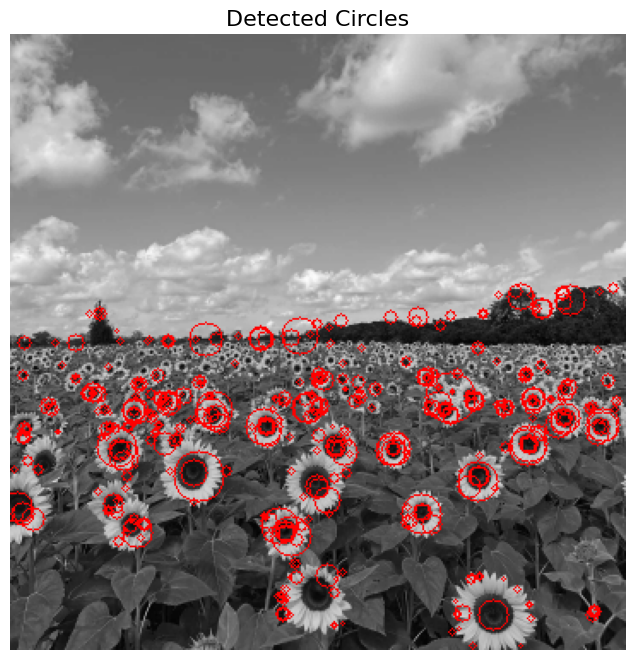

In [33]:
# Set up parameters for scale space blob detection
minimum_sigma = 1.0  # Minimum sigma value (smaller values for smaller blobs)
maximum_sigma = 2.0  # Maximum sigma value (larger values for larger blobs)
n = 4 # Number of sigma values
threshold = 0.35  # Threshold for blob detection

circles = []

# iterate through sigma values to delete overlapping blobs
for sigma in np.linspace(minimum_sigma, maximum_sigma, n):
    # Compute the Laplacian of Gaussian
    image = cv.GaussianBlur(gray_image, (0, 0), sigma)
    image = cv.Laplacian(image, cv.CV_64F)

    # Compute the blob response
    response = np.abs(image) 

    # Find the blobs in the response map
    blob_mask = response > threshold * response.max()

    # find contours in the mask
    contours, _ = cv.findContours(blob_mask.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # iterate through the contours and append the circles to the list
    for contour in contours:
        if cv.contourArea(contour) >= 4:
            ((x, y), r) = cv.minEnclosingCircle(contour)
            c = (int(x), int(y))
            r = int(r)
            circles.append((c, r, sigma))

# sort the detected circles by their radius
circles = sorted(circles, key=lambda x: -x[1])

# parameters of the largst
large_circle = circles[0]
center, radius, sigma = large_circle

print(f"Parameters of the largest circle: center={center}, radius={radius}, sigma={sigma}")

# Convert the grayscale image to a color image for drawing circles
output_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Draw all detected circles with the specified line thickness
for (center, radius, sigma) in circles:
    cv.circle(output_image, center, radius, (0, 0, 255), 1)  # Red color

# Display the output image with detected circles using matplotlib
plt.figure(figsize=(8, 8))  # Adjusted figure size
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB), cmap='gray')  # Convert to RGB color space
plt.axis('off')  # Hide axes
plt.title('Detected Circles', fontsize=16)  # Slightly larger title font
plt.show()